In [1]:
from astropy.io import fits
import os
from pathlib import Path
import random
import pandas as pd
import numpy as np
import subprocess

In [2]:
from astropy.visualization import make_lupton_rgb
from astropy.io import fits
from matplotlib.colors import LogNorm
import matplotlib.pyplot as plt

In [13]:
DES_SVA_TILES = pd.read_pickle("/data/scratch/des/sva_map.pickle")
DES_DIR = Path(
    "/nfs/turbo/lsa-regier/scratch/gapatron/desdr-server.ncsa.illinois.edu/despublic/dr2_tiles/"
)
DES_SUBDIR = np.random.choice(DES_SVA_TILES)
DES_SUBDIR

'DES2253-5414'

In [14]:
psf_dir = f"/nfs/turbo/lsa-regier/scratch/gapatron/psf-models/dr2_tiles/{DES_SUBDIR}"
print(os.path.exists(psf_dir))

True


In [15]:
files = os.listdir(DES_DIR / Path(DES_SUBDIR))
file_r = [f for f in files if f.endswith("r_nobkg.fits.fz")][0]
file_g = [f for f in files if f.endswith("g_nobkg.fits.fz")][0]
file_i = [f for f in files if f.endswith("i_nobkg.fits.fz")][0]
image_des_r = fits.getdata(f"{DES_DIR}/{DES_SUBDIR}/{file_r}")
image_des_g = fits.getdata(f"{DES_DIR}/{DES_SUBDIR}/{file_g}")
image_des_i = fits.getdata(f"{DES_DIR}/{DES_SUBDIR}/{file_i}")

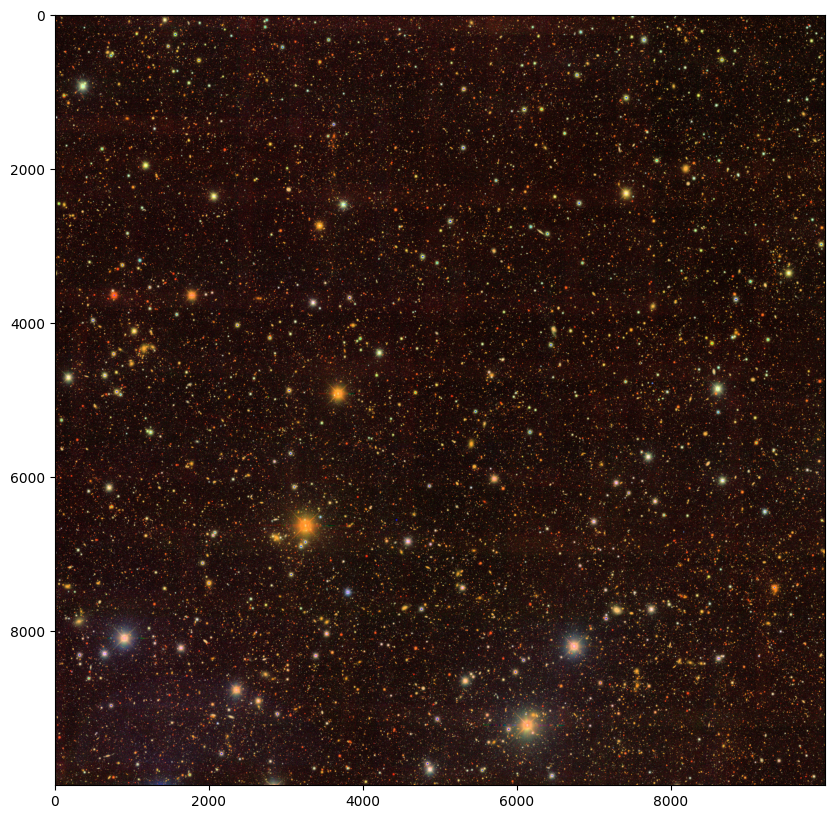

In [16]:
rgb_default = make_lupton_rgb(image_des_i, image_des_r, image_des_g)
plt.figure(figsize=(10,10))
plt.imshow(rgb_default)

In [17]:
main_path = DES_DIR / Path(DES_SUBDIR) / Path(f"{DES_SUBDIR}_dr2_main.fits")
flux_path = DES_DIR / Path(DES_SUBDIR) / Path(f"{DES_SUBDIR}_dr2_flux.fits")
main_data = fits.getdata(main_path)
main_df = pd.DataFrame(main_data)
flux_data = fits.getdata(flux_path)
flux_df = pd.DataFrame(flux_data)
full_df = pd.merge(
    main_df, flux_df, left_on="COADD_OBJECT_ID", right_on="COADD_OBJECT_ID", how="left"
)
full_df

,COADD_OBJECT_ID,TILENAME_x,HPIX_32_x,HPIX_64_x,HPIX_1024_x,HPIX_4096_x,HPIX_16384_x,RA_x,DEC_x,ALPHAWIN_J2000_x,...,WAVG_FLUX_PSF_G_y,WAVG_FLUX_PSF_R_y,WAVG_FLUX_PSF_I_y,WAVG_FLUX_PSF_Z_y,WAVG_FLUX_PSF_Y_y,WAVG_FLUXERR_PSF_G_y,WAVG_FLUXERR_PSF_R_y,WAVG_FLUXERR_PSF_I_y,WAVG_FLUXERR_PSF_Z_y,WAVG_FLUXERR_PSF_Y_y
0,982069623,DES2253-5414,11557,46230,11834953,189359253,3029748049,342.796674,-54.541440,342.796674,...,1.309851e+04,2.138436e+04,2.655006e+04,2.761017e+04,2.768731e+04,31.956301,35.697109,44.809097,63.377956,173.464539
1,982031600,DES2253-5414,11557,46230,11834975,189359607,3029753726,342.796703,-54.181171,342.796703,...,1.921020e+02,2.345343e+02,inf,inf,inf,20.580423,20.945396,-inf,-inf,-inf
2,982058732,DES2253-5414,11557,46230,11834957,189359318,3029749097,342.796709,-54.436386,342.796709,...,3.011335e+02,2.966192e+02,4.593687e+02,inf,inf,73.470680,48.176582,57.768616,-inf,-inf
3,982019962,DES2253-5414,11557,46231,11835147,189362366,3029797862,342.796816,-54.074756,342.796816,...,inf,2.449261e+02,inf,inf,inf,-inf,54.396263,-inf,-inf,-inf
4,982018707,DES2253-5414,11557,46231,11835147,189362367,3029797881,342.797213,-54.064537,342.797213,...,inf,inf,inf,inf,inf,-inf,-inf,-inf,-inf,-inf
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76045,981998610,DES2253-5414,11557,46229,11834845,189357521,3029720342,344.018123,-53.885176,344.018123,...,inf,inf,inf,inf,inf,-inf,-inf,-inf,-inf,-inf
76046,982050959,DES2253-5414,11557,46229,11834773,189356371,3029701936,344.018126,-54.362216,344.018126,...,inf,inf,inf,inf,inf,-inf,-inf,-inf,-inf,-inf
76047,982010751,DES2253-5414,11557,46229,11834835,189357372,3029717961,344.018135,-53.993413,344.018135,...,inf,inf,inf,1.061461e+03,1.832400e+03,-inf,-inf,-inf,131.127838,339.737823
76048,982007363,DES2253-5414,11557,46229,11834838,189357418,3029718689,344.018141,-53.963843,344.018141,...,inf,2.474688e+02,inf,inf,inf,-inf,47.933308,-inf,-inf,-inf


In [18]:
fluxes = np.array(
            full_df[
                [
                    "FLUX_AUTO_G_x",
                    "FLUX_AUTO_R_x",
                    "FLUX_AUTO_I_x",
                    "FLUX_AUTO_Z_x",
                ]
            ]
        )

fluxes *= (fluxes > 0)

hlrs = 0.263 * np.array(full_df["FLUX_RADIUS_R"])
hlrs = 1e-4 + hlrs * (hlrs > 0)
a = np.array(full_df["A_IMAGE"])
b = np.array(full_df["B_IMAGE"])
g = (a - b) / (a + b)
angle = np.arctan(b / a)
g1 = g * np.cos(angle)
g2 = g * np.sin(angle)


In [19]:
mock_catalog = pd.DataFrame()
mock_catalog["RA"] = np.array(full_df["ALPHAWIN_J2000_x"])
mock_catalog["DEC"] = np.array(full_df["DEC_x"])
mock_catalog["X"] = np.array(full_df["XWIN_IMAGE_R"])
mock_catalog["Y"] = np.array(full_df["YWIN_IMAGE_R"])
mock_catalog["MEM"] = 0
mock_catalog["FLUX_G"] = fluxes[:, 0]
mock_catalog["FLUX_R"] = fluxes[:, 1]
mock_catalog["FLUX_I"] = fluxes[:, 2]
mock_catalog["FLUX_Z"] = fluxes[:, 3]
mock_catalog["HLR"] = hlrs
mock_catalog["FRACDEV"] = 0
mock_catalog["G1"] = g1
mock_catalog["G2"] = g2
mock_catalog["Z"] = 0
mock_catalog["SOURCE_TYPE"] = 0

In [20]:
mock_catalog

,RA,DEC,X,Y,MEM,FLUX_G,FLUX_R,FLUX_I,FLUX_Z,HLR,FRACDEV,G1,G2,Z,SOURCE_TYPE
0,342.796674,-54.541440,9850.341247,838.066819,0,20043.767578,36575.199219,47695.824219,54707.175781,1.246824,0,0.230745,0.133599,0,0
1,342.796703,-54.181171,9892.657677,5769.262101,0,252.889282,321.041504,366.086578,236.050156,0.823454,0,0.027106,0.025172,0,0
2,342.796709,-54.436386,9862.425469,2276.077184,0,241.987244,484.772430,478.654114,953.314270,1.002795,0,0.185010,0.118375,0,0
3,342.796816,-54.074756,9904.841883,7226.353255,0,15.004930,67.508949,74.737938,164.957352,0.529493,0,0.151704,0.104506,0,0
4,342.797213,-54.064537,9902.795949,7366.360055,0,11.062568,103.484947,141.256180,117.058266,0.555284,0,0.037048,0.033522,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76045,344.018123,-53.885176,74.097661,9821.059739,0,103.033096,145.103867,209.409134,314.252716,0.576649,0,0.097205,0.075864,0,0
76046,344.018126,-54.362216,129.816302,3291.537104,0,9.511668,76.032494,113.587326,147.880722,0.697272,0,0.188935,0.119848,0,0
76047,344.018135,-53.993413,86.227655,8339.508086,0,17.622831,107.357788,294.775238,849.575928,0.517942,0,0.221393,0.130820,0,0
76048,344.018141,-53.963843,82.548364,8743.988040,0,101.121689,138.690628,98.328735,147.350586,0.591182,0,0.040048,0.035957,0,0


In [21]:
from astropy.io import ascii as astro_ascii
from astropy.table import Table

DATA_PATH = "/home/kapnadak/bliss/case_studies/galaxy_clustering/data"
CATALOG_PATH = os.path.join(DATA_PATH, "catalogs")

file_name = f"{CATALOG_PATH}/galsim_des_000.dat"
if not os.path.exists(CATALOG_PATH):
    os.makedirs(CATALOG_PATH)
catalog_table = Table.from_pandas(mock_catalog)
astro_ascii.write(catalog_table, file_name, format="no_header", overwrite=True)

In [22]:
image_size = 10000
nfiles = 1
data_dir = DATA_PATH
input_dir = f"{DATA_PATH}/catalogs"
output_dir = f"{DATA_PATH}/images"
output_ext = "galsim_des_000_g.fits"
psf_dir = f"/nfs/turbo/lsa-regier/scratch/gapatron/psf-models/dr2_tiles/{DES_SUBDIR}"
psf_file = [f for f in os.listdir(psf_dir) if f.endswith("g_nobkg.psf")][0]
args = []
GALSIM_PATH = "/home/kapnadak/bliss/case_studies/galaxy_clustering/data_generation/custom-single-image-galsim.yaml"
args.append("galsim")
args.append(f"{GALSIM_PATH}")
args.append(f"variables.image_size={image_size}")
args.append(f"variables.nfiles={nfiles}")
args.append(f"variables.input_dir={input_dir}")
args.append(f"variables.input_file=galsim_des_000.dat")
args.append(f"variables.output_dir={output_dir}")
args.append(f"variables.output_file={output_ext}")
args.append(f"variables.psf_dir={psf_dir}")
args.append(f"variables.psf_file={psf_file}")
args.append(f"variables.flux_col=5")
subprocess.run(args, shell=False, check=False)

Reading config file /home/kapnadak/bliss/case_studies/galaxy_clustering/data_generation/custom-single-image-galsim.yaml
These fields are not (directly) processed by the config processing.
Start file 0 = /home/kapnadak/bliss/case_studies/galaxy_clustering/data/images/galsim_des_000_g.fits
Using 32 processes for stamp processing
File 0 = /home/kapnadak/bliss/case_studies/galaxy_clustering/data/images/galsim_des_000_g.fits: time = 286.888072 sec
Done building files


CompletedProcess(args=['galsim', '/home/kapnadak/bliss/case_studies/galaxy_clustering/data_generation/custom-single-image-galsim.yaml', 'variables.image_size=10000', 'variables.nfiles=1', 'variables.input_dir=/home/kapnadak/bliss/case_studies/galaxy_clustering/data/catalogs', 'variables.input_file=galsim_des_000.dat', 'variables.output_dir=/home/kapnadak/bliss/case_studies/galaxy_clustering/data/images', 'variables.output_file=galsim_des_000_g.fits', 'variables.psf_dir=/nfs/turbo/lsa-regier/scratch/gapatron/psf-models/dr2_tiles/DES2253-5414', 'variables.psf_file=DES2253-5414_r4575p01_g_nobkg.psf', 'variables.flux_col=5'], returncode=0)

In [23]:
image_size = 10000
nfiles = 1
data_dir = DATA_PATH
input_dir = f"{DATA_PATH}/catalogs"
output_dir = f"{DATA_PATH}/images"
output_ext = "galsim_des_000_r.fits"
psf_dir = f"/nfs/turbo/lsa-regier/scratch/gapatron/psf-models/dr2_tiles/{DES_SUBDIR}"
psf_file = [f for f in os.listdir(psf_dir) if f.endswith("r_nobkg.psf")][0]
args = []
GALSIM_PATH = "/home/kapnadak/bliss/case_studies/galaxy_clustering/data_generation/custom-single-image-galsim.yaml"
args.append("galsim")
args.append(f"{GALSIM_PATH}")
args.append(f"variables.image_size={image_size}")
args.append(f"variables.nfiles={nfiles}")
args.append(f"variables.input_dir={input_dir}")
args.append(f"variables.input_file=galsim_des_000.dat")
args.append(f"variables.output_dir={output_dir}")
args.append(f"variables.output_file={output_ext}")
args.append(f"variables.psf_dir={psf_dir}")
args.append(f"variables.psf_file={psf_file}")
args.append(f"variables.flux_col=6")
subprocess.run(args, shell=False, check=False)

Reading config file /home/kapnadak/bliss/case_studies/galaxy_clustering/data_generation/custom-single-image-galsim.yaml
These fields are not (directly) processed by the config processing.
Start file 0 = /home/kapnadak/bliss/case_studies/galaxy_clustering/data/images/galsim_des_000_r.fits
Using 32 processes for stamp processing
File 0 = /home/kapnadak/bliss/case_studies/galaxy_clustering/data/images/galsim_des_000_r.fits: time = 282.122711 sec
Done building files


CompletedProcess(args=['galsim', '/home/kapnadak/bliss/case_studies/galaxy_clustering/data_generation/custom-single-image-galsim.yaml', 'variables.image_size=10000', 'variables.nfiles=1', 'variables.input_dir=/home/kapnadak/bliss/case_studies/galaxy_clustering/data/catalogs', 'variables.input_file=galsim_des_000.dat', 'variables.output_dir=/home/kapnadak/bliss/case_studies/galaxy_clustering/data/images', 'variables.output_file=galsim_des_000_r.fits', 'variables.psf_dir=/nfs/turbo/lsa-regier/scratch/gapatron/psf-models/dr2_tiles/DES2253-5414', 'variables.psf_file=DES2253-5414_r4575p01_r_nobkg.psf', 'variables.flux_col=6'], returncode=0)

In [24]:
image_size = 10000
nfiles = 1
data_dir = DATA_PATH
input_dir = f"{DATA_PATH}/catalogs"
output_dir = f"{DATA_PATH}/images"
output_ext = "galsim_des_000_i.fits"
psf_dir = f"/nfs/turbo/lsa-regier/scratch/gapatron/psf-models/dr2_tiles/{DES_SUBDIR}"
psf_file = [f for f in os.listdir(psf_dir) if f.endswith("i_nobkg.psf")][0]
args = []
GALSIM_PATH = "/home/kapnadak/bliss/case_studies/galaxy_clustering/data_generation/custom-single-image-galsim.yaml"
args.append("galsim")
args.append(f"{GALSIM_PATH}")
args.append(f"variables.image_size={image_size}")
args.append(f"variables.nfiles={nfiles}")
args.append(f"variables.input_dir={input_dir}")
args.append(f"variables.input_file=galsim_des_000.dat")
args.append(f"variables.output_dir={output_dir}")
args.append(f"variables.output_file={output_ext}")
args.append(f"variables.psf_dir={psf_dir}")
args.append(f"variables.psf_file={psf_file}")
args.append(f"variables.flux_col=7")
subprocess.run(args, shell=False, check=False)

Reading config file /home/kapnadak/bliss/case_studies/galaxy_clustering/data_generation/custom-single-image-galsim.yaml
These fields are not (directly) processed by the config processing.
Start file 0 = /home/kapnadak/bliss/case_studies/galaxy_clustering/data/images/galsim_des_000_i.fits
Using 32 processes for stamp processing
File 0 = /home/kapnadak/bliss/case_studies/galaxy_clustering/data/images/galsim_des_000_i.fits: time = 275.050404 sec
Done building files


CompletedProcess(args=['galsim', '/home/kapnadak/bliss/case_studies/galaxy_clustering/data_generation/custom-single-image-galsim.yaml', 'variables.image_size=10000', 'variables.nfiles=1', 'variables.input_dir=/home/kapnadak/bliss/case_studies/galaxy_clustering/data/catalogs', 'variables.input_file=galsim_des_000.dat', 'variables.output_dir=/home/kapnadak/bliss/case_studies/galaxy_clustering/data/images', 'variables.output_file=galsim_des_000_i.fits', 'variables.psf_dir=/nfs/turbo/lsa-regier/scratch/gapatron/psf-models/dr2_tiles/DES2253-5414', 'variables.psf_file=DES2253-5414_r4575p01_i_nobkg.psf', 'variables.flux_col=7'], returncode=0)

In [25]:
image_size = 10000
nfiles = 1
data_dir = DATA_PATH
input_dir = f"{DATA_PATH}/catalogs"
output_dir = f"{DATA_PATH}/images"
output_ext = "galsim_des_000_z.fits"
psf_dir = f"/nfs/turbo/lsa-regier/scratch/gapatron/psf-models/dr2_tiles/{DES_SUBDIR}"
psf_file = [f for f in os.listdir(psf_dir) if f.endswith("z_nobkg.psf")][0]
args = []
GALSIM_PATH = "/home/kapnadak/bliss/case_studies/galaxy_clustering/data_generation/custom-single-image-galsim.yaml"
args.append("galsim")
args.append(f"{GALSIM_PATH}")
args.append(f"variables.image_size={image_size}")
args.append(f"variables.nfiles={nfiles}")
args.append(f"variables.input_dir={input_dir}")
args.append(f"variables.input_file=galsim_des_000.dat")
args.append(f"variables.output_dir={output_dir}")
args.append(f"variables.output_file={output_ext}")
args.append(f"variables.psf_dir={psf_dir}")
args.append(f"variables.psf_file={psf_file}")
args.append(f"variables.flux_col=8")
subprocess.run(args, shell=False, check=False)

Reading config file /home/kapnadak/bliss/case_studies/galaxy_clustering/data_generation/custom-single-image-galsim.yaml
These fields are not (directly) processed by the config processing.
Start file 0 = /home/kapnadak/bliss/case_studies/galaxy_clustering/data/images/galsim_des_000_z.fits
Using 32 processes for stamp processing
File 0 = /home/kapnadak/bliss/case_studies/galaxy_clustering/data/images/galsim_des_000_z.fits: time = 280.283592 sec
Done building files


CompletedProcess(args=['galsim', '/home/kapnadak/bliss/case_studies/galaxy_clustering/data_generation/custom-single-image-galsim.yaml', 'variables.image_size=10000', 'variables.nfiles=1', 'variables.input_dir=/home/kapnadak/bliss/case_studies/galaxy_clustering/data/catalogs', 'variables.input_file=galsim_des_000.dat', 'variables.output_dir=/home/kapnadak/bliss/case_studies/galaxy_clustering/data/images', 'variables.output_file=galsim_des_000_z.fits', 'variables.psf_dir=/nfs/turbo/lsa-regier/scratch/gapatron/psf-models/dr2_tiles/DES2253-5414', 'variables.psf_file=DES2253-5414_r4575p01_z_nobkg.psf', 'variables.flux_col=8'], returncode=0)

In [26]:
image_galsim_r = fits.getdata("/home/kapnadak/bliss/case_studies/galaxy_clustering/data/images/galsim_des_000_r.fits")
image_galsim_g = fits.getdata("/home/kapnadak/bliss/case_studies/galaxy_clustering/data/images/galsim_des_000_g.fits")
image_galsim_i = fits.getdata("/home/kapnadak/bliss/case_studies/galaxy_clustering/data/images/galsim_des_000_i.fits")

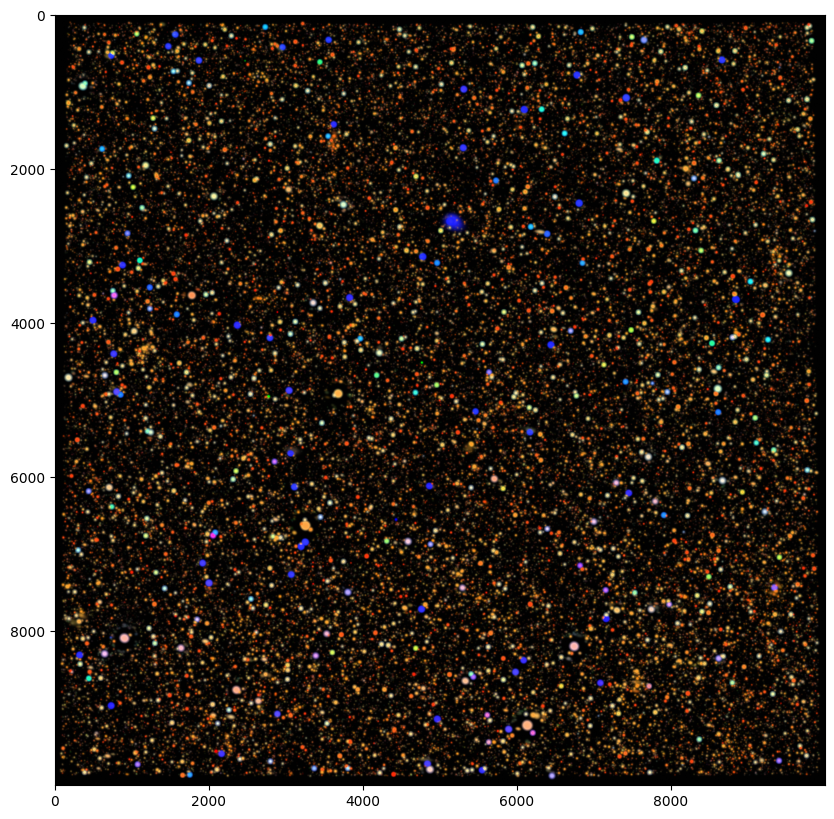

In [28]:
rgb_default = make_lupton_rgb(image_galsim_i, image_galsim_r, image_galsim_g)
plt.figure(figsize=(10,10))
plt.imshow(rgb_default)

In [33]:
residual_r = image_des_r - image_galsim_r
residual_g = image_des_g - image_galsim_g
residual_i = image_des_i - image_galsim_i

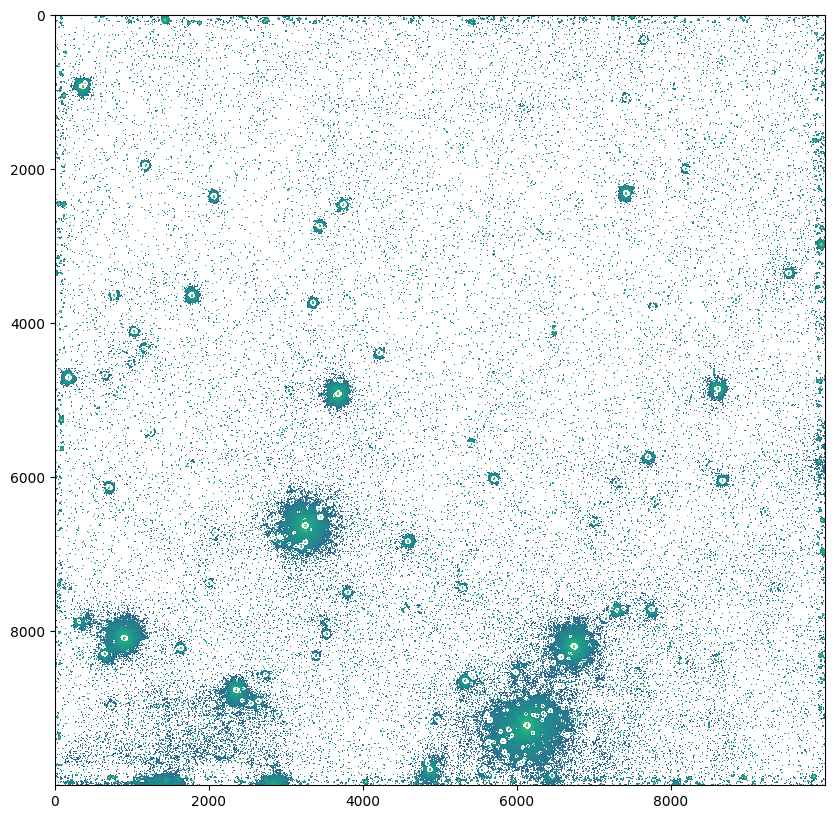

In [35]:
plt.figure(figsize=(10,10))
plt.imshow(residual_r, norm=LogNorm())